In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
import numpy as np
from glob import glob
from sklearn.decomposition import PCA

target = ['YL_M1_B1_W1','YR_M1_B1_W1','YL_M1_B1_W2','YR_M1_B1_W2']
data_path = glob('./data/*.csv')
data_path = [ './data\\data_c100.csv',
 './data\\data_c30.csv',
 './data\\data_c40.csv',
 './data\\data_c50.csv',
 './data\\data_c70.csv',
            './data\\data_s100.csv',
 './data\\data_s30.csv',
 './data\\data_s40.csv',
 './data\\data_s50.csv',
 './data\\data_s70.csv']

data_path

# kfold

['./data\\data_c100.csv',
 './data\\data_c30.csv',
 './data\\data_c40.csv',
 './data\\data_c50.csv',
 './data\\data_c70.csv',
 './data\\data_s100.csv',
 './data\\data_s30.csv',
 './data\\data_s40.csv',
 './data\\data_s50.csv',
 './data\\data_s70.csv']

In [3]:
pd.read_csv('./data/data_columns.csv')

name                description
0              Distance                      거리[m]
1           A_M1_C_B1_Y        대차상부 차체 횡가속도[m/s^2]
2           A_M1_C_B1_Z       대차상부 차체 수직가속도[m/s^2]
3        A_M1_B1_W1_Y_L   좌측 전위 대차 프레임 횡가속도[m/s^2]
4        A_M1_B1_BC_Y_L   좌측 중앙 대차 프레임 횡가속도[m/s^2]
5        A_M1_B1_W2_Y_L   좌측 후위 대차 프레임 횡가속도[m/s^2]
6        A_M1_B1_W1_Y_R   우측 전위 대차 프레임 횡가속도[m/s^2]
7        A_M1_B1_BC_Y_R   우측 중앙 대차 프레임 횡가속도[m/s^2]
8        A_M1_B1_W2_Y_R   우측 후위 대차 프레임 횡가속도[m/s^2]
9        A_M1_B1_W1_Z_L  좌측 전위 대차 프레임 수직가속도[m/s^2]
10       A_M1_B1_BC_Z_L  좌측 중앙 대차 프레임 수직가속도[m/s^2]
11       A_M1_B1_W2_Z_L  좌측 후위 대차 프레임 수직가속도[m/s^2]
12       A_M1_B1_W1_Z_R  우측 전위 대차 프레임 수직가속도[m/s^2]
13       A_M1_B1_BC_Z_R  우측 중앙 대차 프레임 수직가속도[m/s^2]
14       A_M1_B1_W2_Z_R  우측 후위 대차 프레임 수직가속도[m/s^2]
15  A__B1_W1_Y_A_axle_L     좌측 전위 액슬박스 횡가속도[m/s^2]
16  A__B1_W2_Y_A_axle_L     좌측 후위 액슬박스 횡가속도[m/s^2]
17  A__B1_W1_Y_A_axle_R     우측 전위 액슬박스 횡가속도[m/s^2]
18  A__B1_W2_Y_A_axle_R     우측 후위 액슬박스 횡가속도[m/s^2]
19  A__B1_W1_Z_A_axle_L    좌측 전위 액슬박스 수직가속도[m/s^2]
20  A__B1_W2_Z_A_axle_L    좌측 후위 액슬박스 수직가속도[m/s^2]
21  A__B1_W1_Z_A_axle_R    우측 전위 액슬박스 수직가속도[m/s^2]
22  A__B1_W2_Z_A_axle_R    우측 후위 액슬박스 수직가속도[m/s^2]
23         V_M1_B1_W1_L          좌측 전위 차륜 수직하중[kN]
24         V_M1_B1_W1_R          우측 전위 차륜 수직하중[kN]
25          QL_M1_B1_W1             좌측 전위 차륜 윤중감소율
26          QR_M1_B1_W1             우측 전위 차륜 윤중감소율
27         V_M1_B1_W2_L          좌측 후위 차륜 수직하중[kN]
28         V_M1_B1_W2_R          우측 후위 차륜 수직하중[kN]
29          QL_M1_B1_W2             좌측 후위 차륜 윤중감소율
30          QR_M1_B1_W2             우측 후위 차륜 윤중감소율
31          YL_M1_B1_W1              좌측 전위 차륜 탈선계수
32          YR_M1_B1_W1              우측 전위 차륜 탈선계수
33          YL_M1_B1_W2              좌측 후위 차륜 탈선계수
34          YR_M1_B1_W2              우측 후위 차륜 탈선계수

In [4]:
data_path = [
 './data\\data_c30.csv',
 './data\\data_c40.csv',
 './data\\data_c50.csv',
 './data\\data_c70.csv',
 './data\\data_c100.csv']
data_c = [pd.merge(pd.read_csv('./data\\lane_data_c.csv',),pd.read_csv(i)) for i in data_path]
data_c = [pd.read_csv(i) for i in data_path]

# tar = data_c[0]
# for i in tar.columns:
#     plt.title(i)
#     tar[i].plot()
#     plt.show()

data_path = [
 './data\\data_s30.csv',
 './data\\data_s40.csv',
 './data\\data_s50.csv',
 './data\\data_s70.csv',
 './data\\data_s100.csv']
data_s = [pd.merge(pd.read_csv('./data\\lane_data_s.csv',),pd.read_csv(i)) for i in data_path]
data_s = [pd.read_csv(i) for i in data_path]

In [5]:
data_c[0][:10000].corr()

Distance  A_M1_C_B1_Y  A_M1_C_B1_Z  A_M1_B1_W1_Y_L  \
Distance             1.000000    -0.190224    -0.001517       -0.036136   
A_M1_C_B1_Y         -0.190224     1.000000    -0.095624       -0.072760   
A_M1_C_B1_Z         -0.001517    -0.095624     1.000000       -0.003675   
A_M1_B1_W1_Y_L      -0.036136    -0.072760    -0.003675        1.000000   
A_M1_B1_BC_Y_L      -0.050174     0.079801    -0.054704        0.551093   
A_M1_B1_W2_Y_L      -0.030575     0.152806    -0.061909       -0.146653   
A_M1_B1_W1_Y_R      -0.034936    -0.067166    -0.006537        0.993812   
A_M1_B1_BC_Y_R      -0.047412     0.079570    -0.055617        0.556494   
A_M1_B1_W2_Y_R      -0.029990     0.152436    -0.063137       -0.121754   
A_M1_B1_W1_Z_L      -0.000524    -0.006782    -0.203787        0.093347   
A_M1_B1_BC_Z_L      -0.000463    -0.018089    -0.253905       -0.003933   
A_M1_B1_W2_Z_L      -0.000138    -0.018709    -0.157068       -0.096166   
A_M1_B1_W1_Z_R      -0.000631     0.021736    -0.220793        0.264540   
A_M1_B1_BC_Z_R      -0.000587     0.020752    -0.268412        0.225038   
A_M1_B1_W2_Z_R      -0.000230     0.008492    -0.166038        0.065212   
A__B1_W1_Y_A_axle_L -0.034794    -0.102526    -0.011844       -0.049764   
A__B1_W2_Y_A_axle_L -0.043057     0.198057    -0.116213        0.336324   
A__B1_W1_Y_A_axle_R -0.033207    -0.097124    -0.013471       -0.062171   
A__B1_W2_Y_A_axle_R -0.038865     0.177993    -0.106125        0.365482   
A__B1_W1_Z_A_axle_L  0.000018     0.003311    -0.148612        0.189212   
A__B1_W2_Z_A_axle_L  0.000035    -0.006397    -0.197479       -0.165734   
A__B1_W1_Z_A_axle_R -0.001258     0.009879    -0.157149        0.140385   
A__B1_W2_Z_A_axle_R -0.000152    -0.007703    -0.197508        0.047567   
V_M1_B1_W1_L        -0.012766    -0.038446    -0.120436        0.157475   
V_M1_B1_W1_R         0.007599     0.059753    -0.149773        0.224198   
QL_M1_B1_W1         -0.012763    -0.038446    -0.120437        0.157475   
QR_M1_B1_W1          0.007596     0.059752    -0.149773        0.224198   
V_M1_B1_W2_L         0.015889    -0.106138    -0.133989       -0.229149   
V_M1_B1_W2_R        -0.019436     0.104151    -0.184544        0.141977   
QL_M1_B1_W2          0.015891    -0.106136    -0.133992       -0.229148   
QR_M1_B1_W2         -0.019439     0.104150    -0.184547        0.141976   
YL_M1_B1_W1          0.148346     0.025568    -0.063337        0.056368   
YR_M1_B1_W1          0.129900     0.057324     0.016895       -0.134034   
YL_M1_B1_W2         -0.017954     0.330435    -0.088674        0.227122   
YR_M1_B1_W2          0.091702    -0.319066     0.078843       -0.208434   

                     A_M1_B1_BC_Y_L  A_M1_B1_W2_Y_L  A_M1_B1_W1_Y_R  \
Distance                  -0.050174       -0.030575       -0.034936   
A_M1_C_B1_Y                0.079801        0.152806       -0.067166   
A_M1_C_B1_Z               -0.054704       -0.061909       -0.006537   
A_M1_B1_W1_Y_L             0.551093       -0.146653        0.993812   
A_M1_B1_BC_Y_L             1.000000        0.744602        0.566721   
A_M1_B1_W2_Y_L             0.744602        1.000000       -0.123177   
A_M1_B1_W1_Y_R             0.566721       -0.123177        1.000000   
A_M1_B1_BC_Y_R             0.989576        0.727925        0.587309   
A_M1_B1_W2_Y_R             0.757858        0.995798       -0.088855   
A_M1_B1_W1_Z_L            -0.075599       -0.164289        0.055219   
A_M1_B1_BC_Z_L            -0.060120       -0.068123       -0.048656   
A_M1_B1_W2_Z_L            -0.010629        0.064324       -0.121662   
A_M1_B1_W1_Z_R             0.160052       -0.021879        0.292171   
A_M1_B1_BC_Z_R             0.259314        0.127389        0.270294   
A_M1_B1_W2_Z_R             0.210019        0.196802        0.102146   
A__B1_W1_Y_A_axle_L        0.093034        0.150096       -0.058610   
A__B1_W2_Y_A_axle_L        0.456453        0.272063        0.336780   
A__B1_W1_Y_A_axle_R        0.117442       

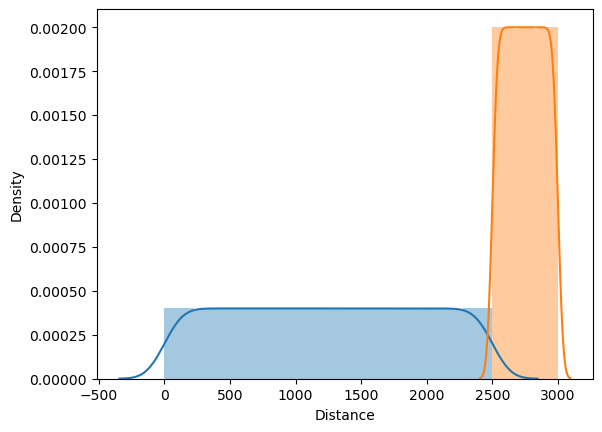

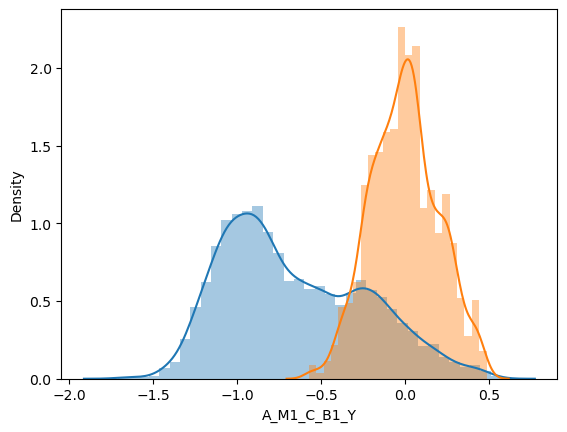

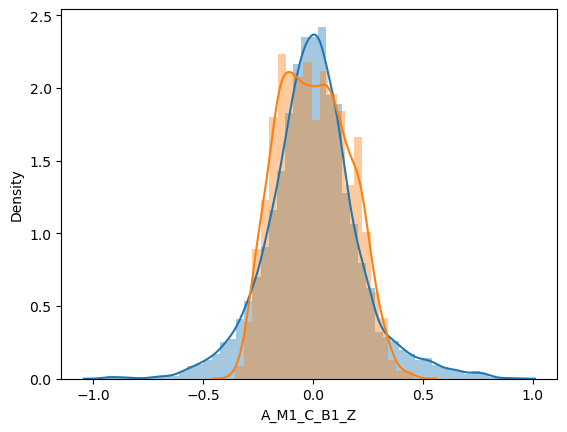

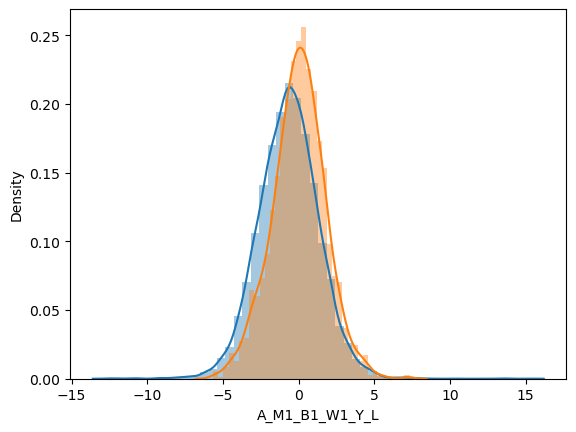

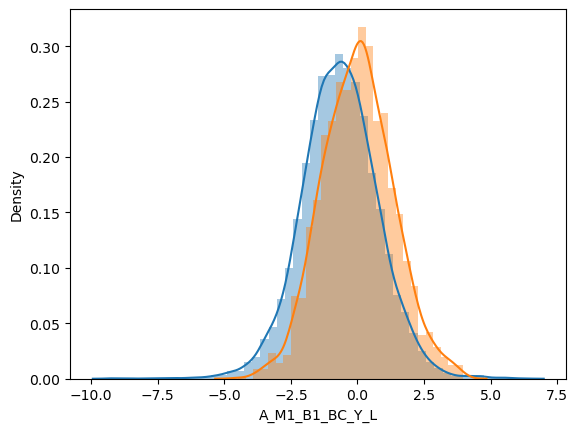

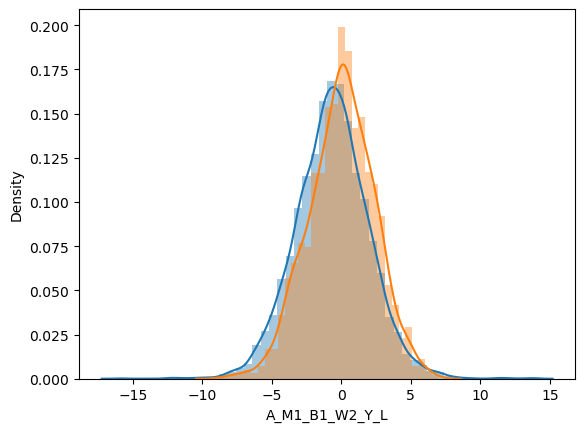

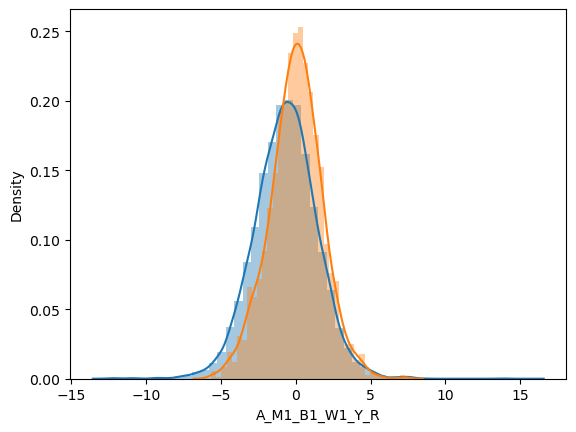

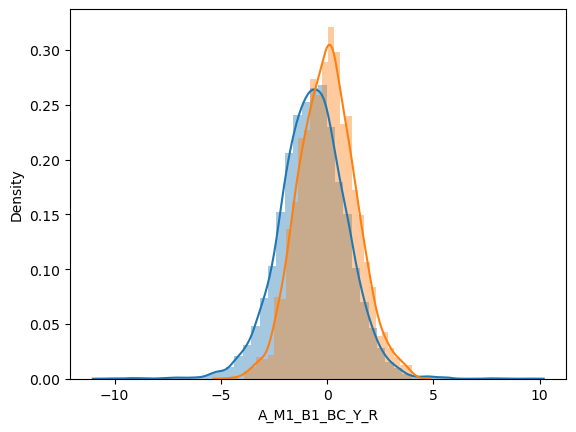

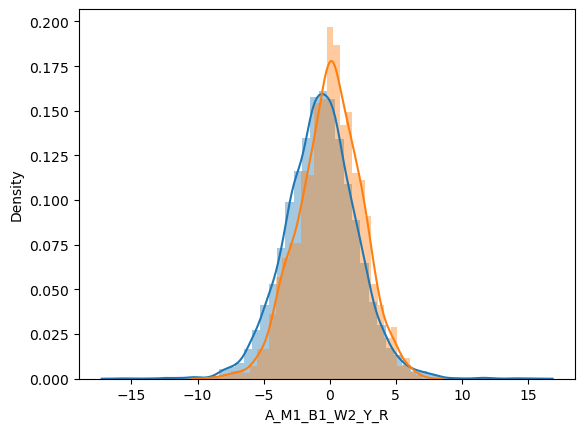

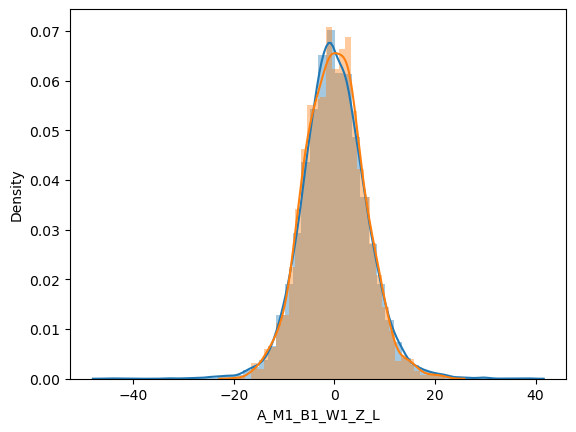

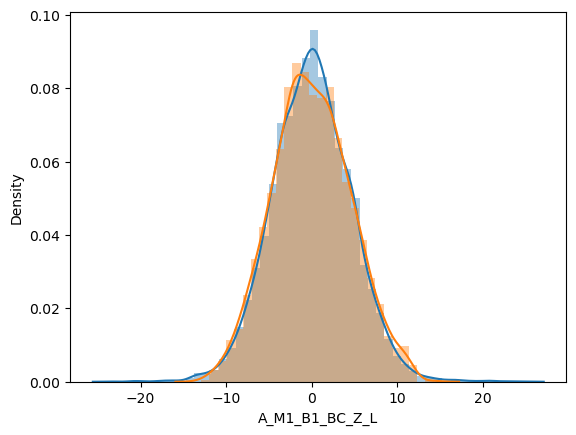

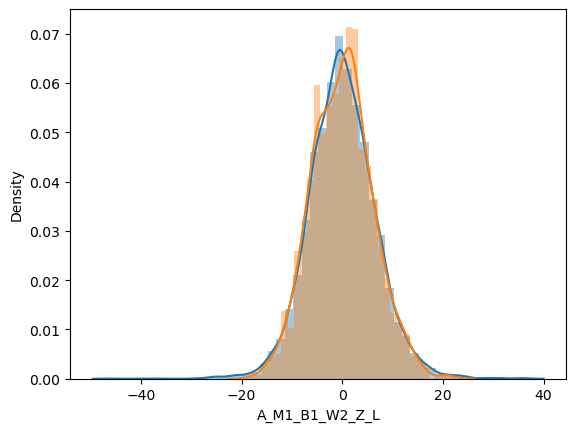

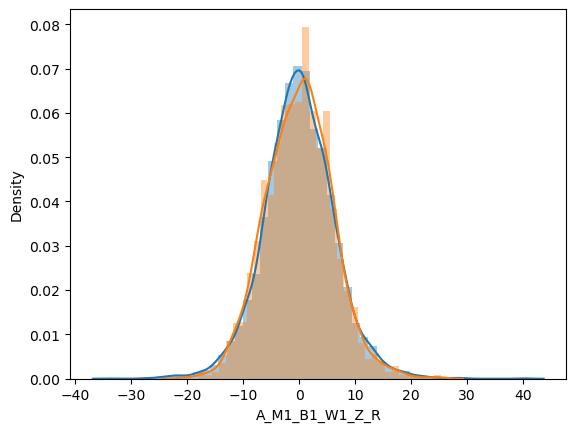

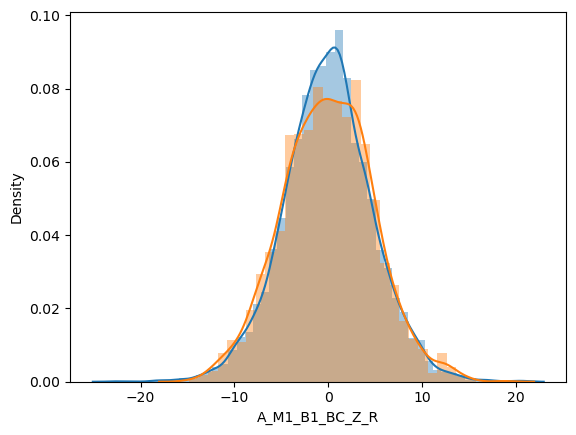

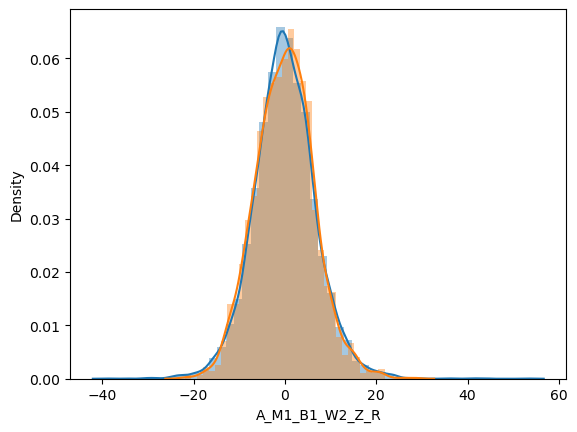

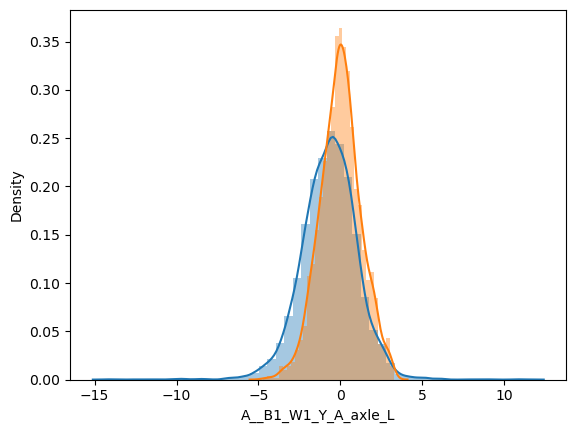

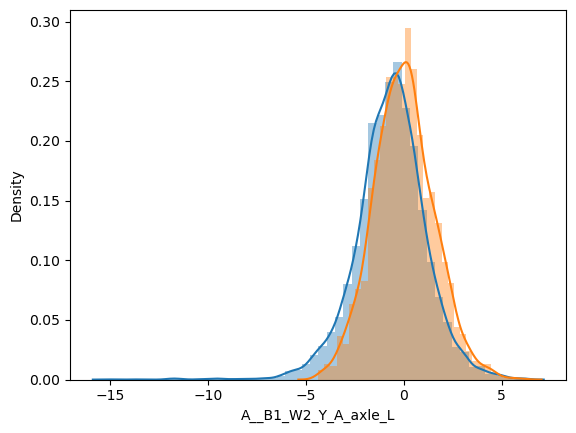

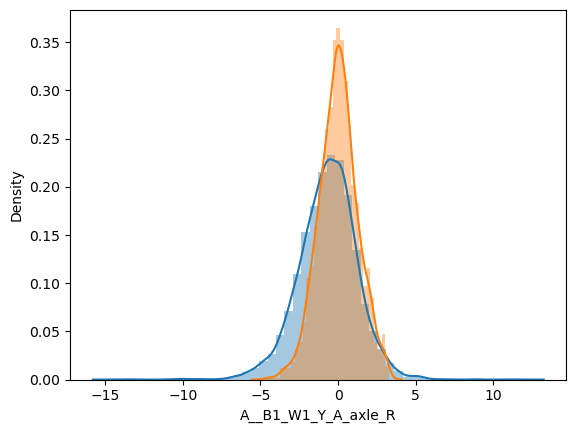

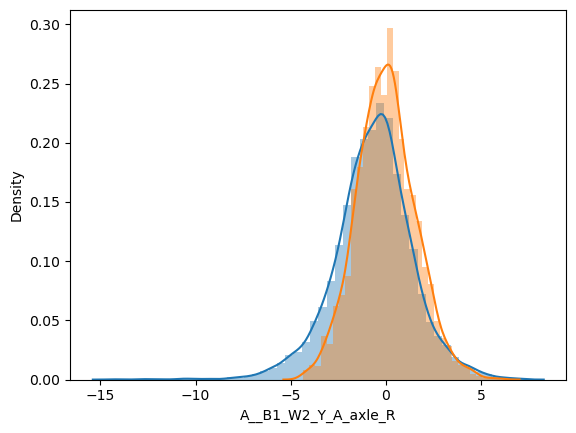

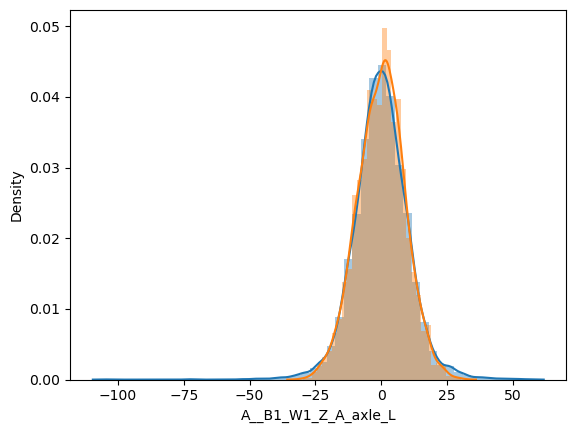

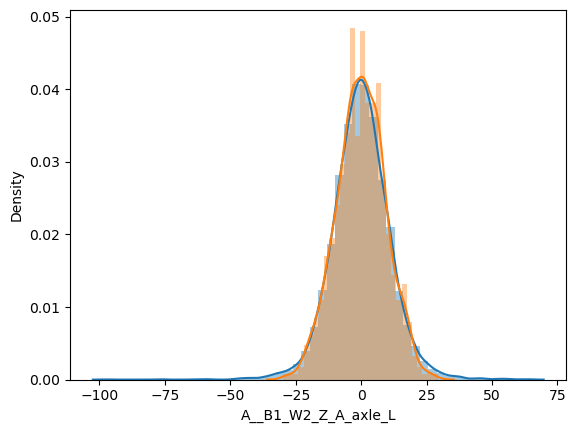

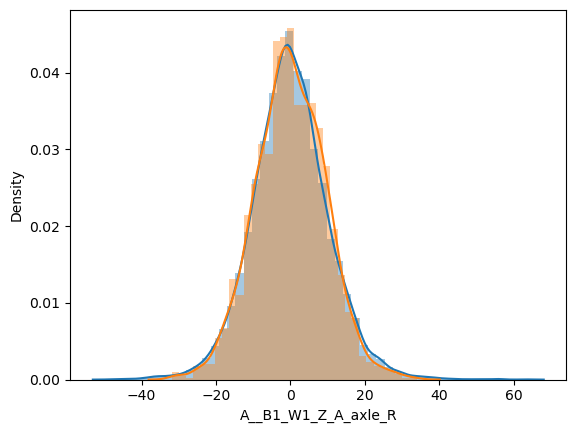

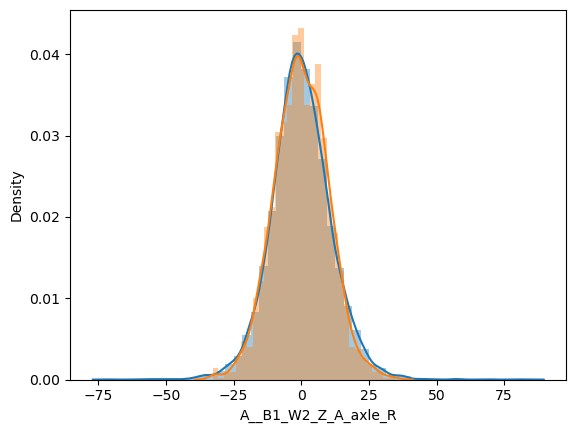

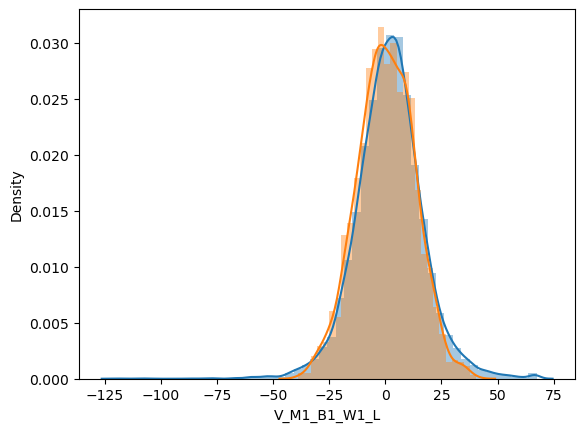

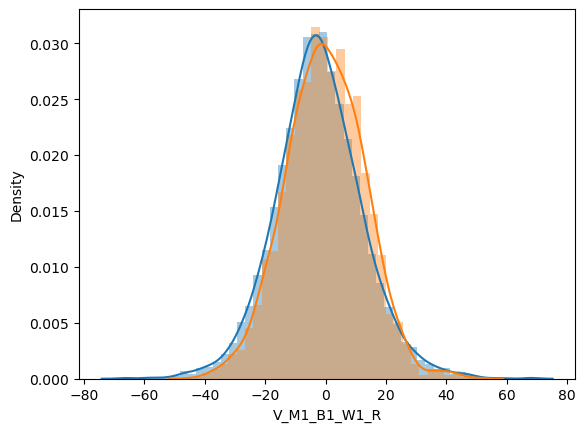

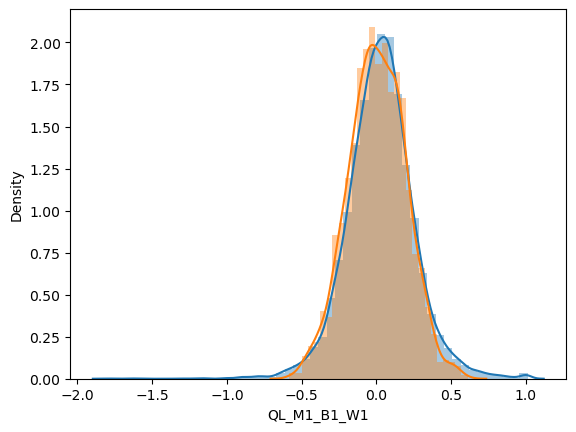

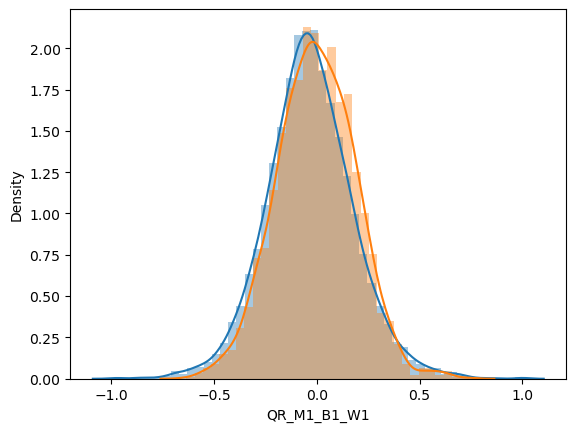

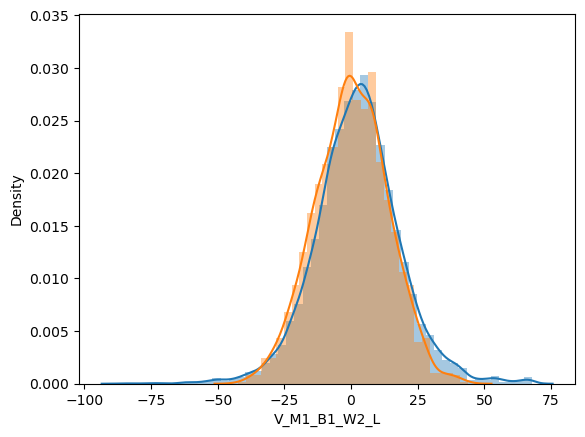

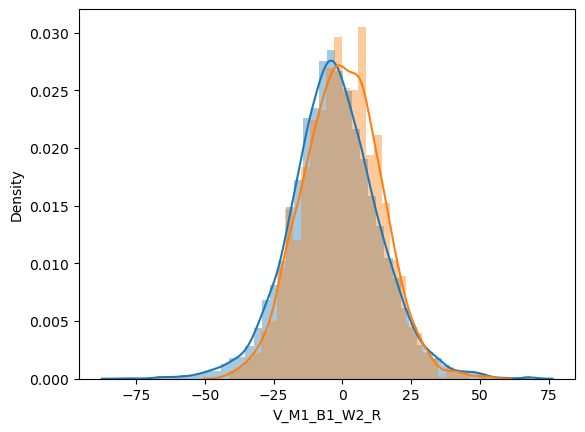

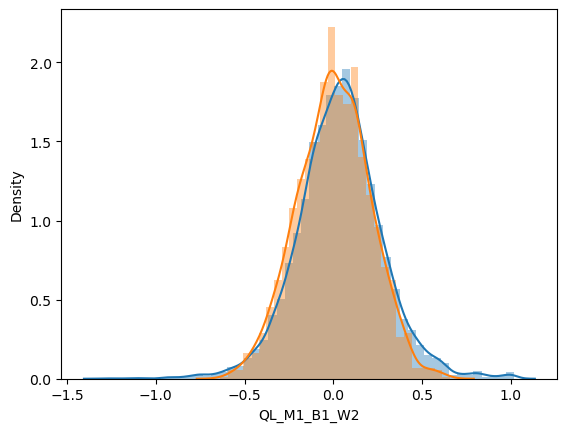

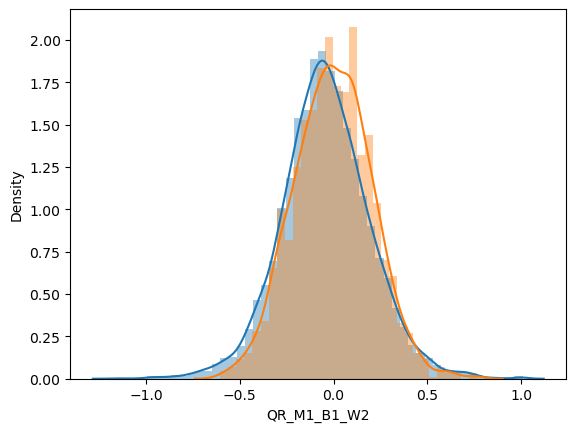

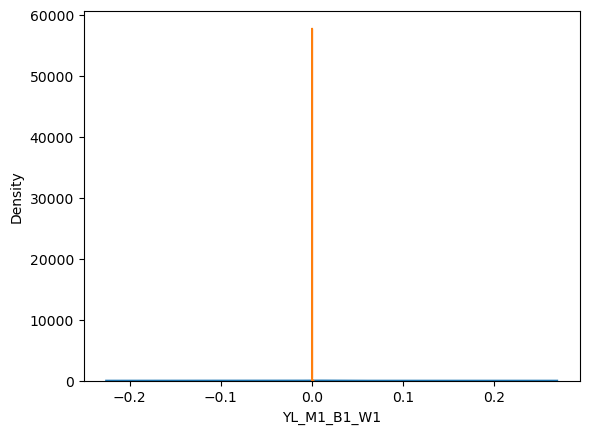

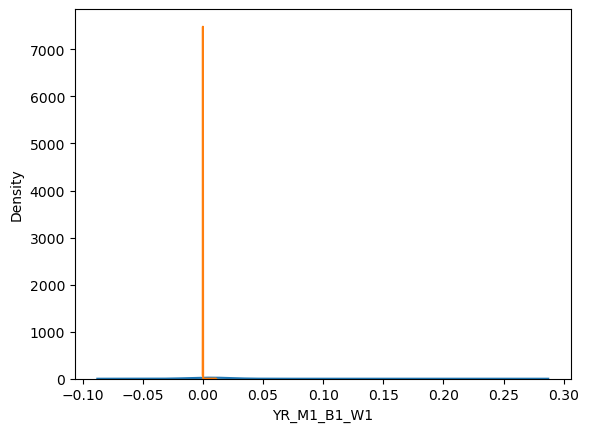

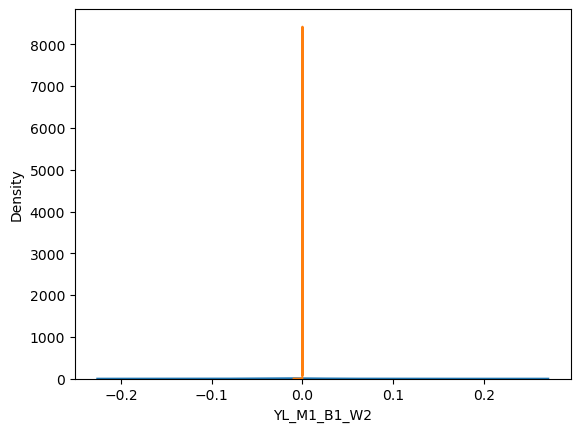

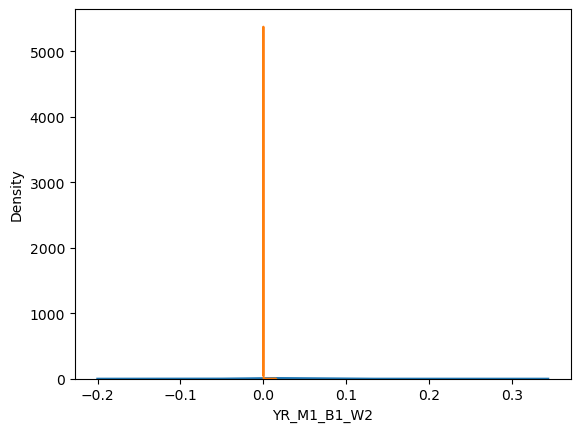

In [9]:
data = data_c[1]
for i in data.columns:
    sns.distplot(data.loc[:10000,i])
    sns.distplot(data.loc[10000:,i])
    plt.show()

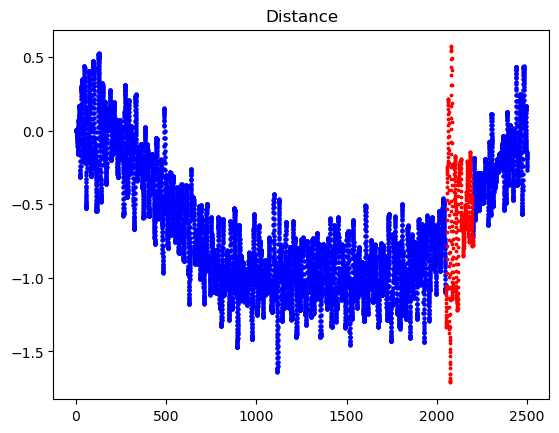

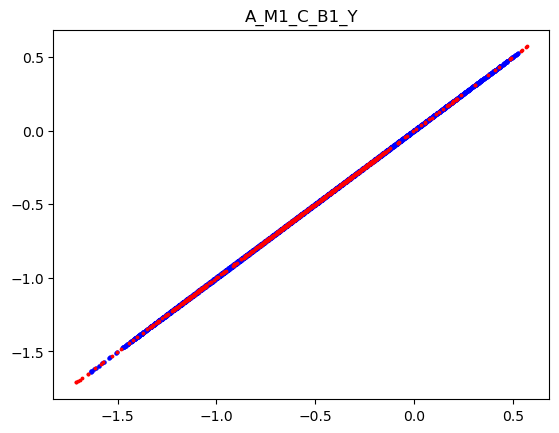

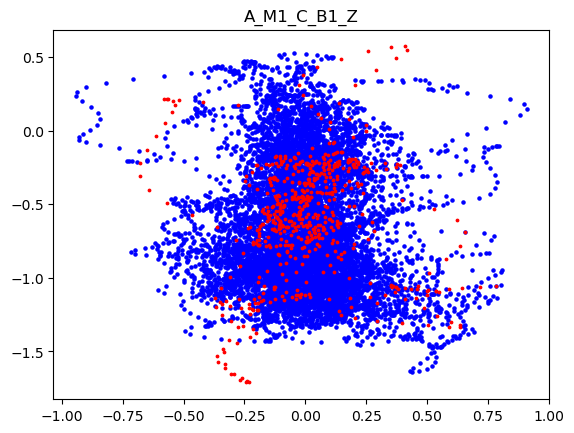

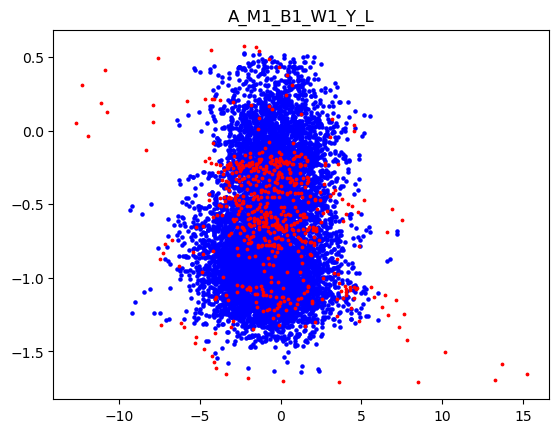

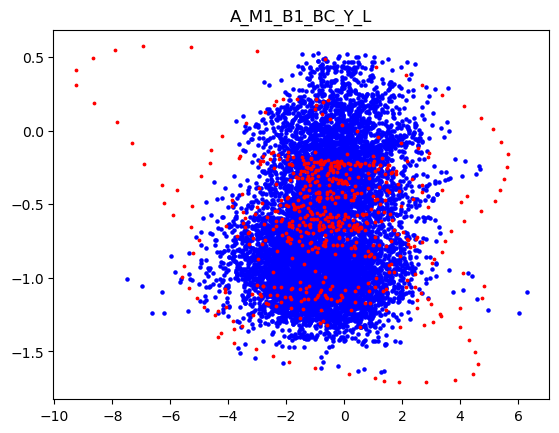

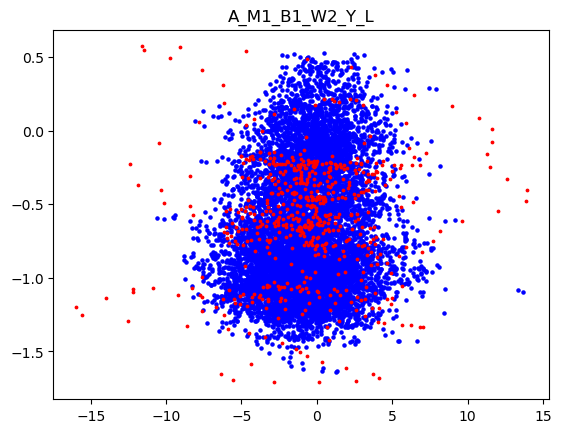

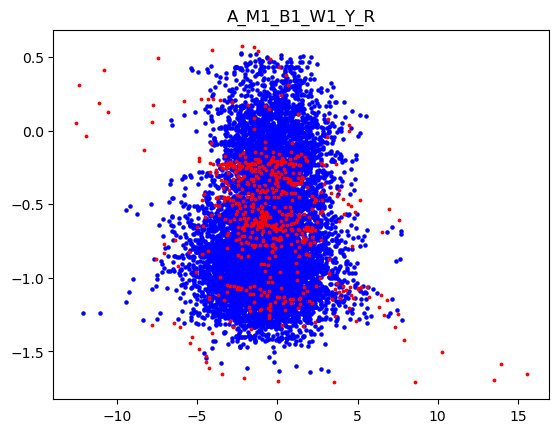

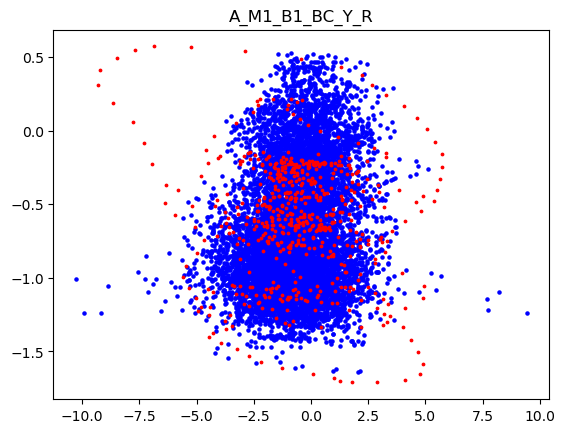

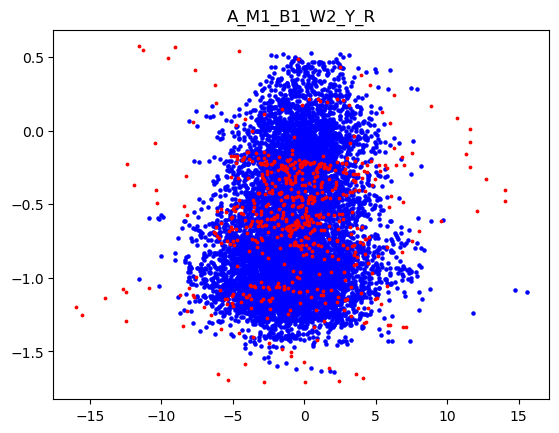

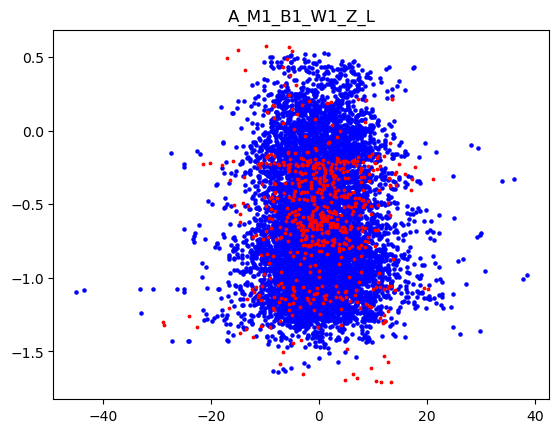

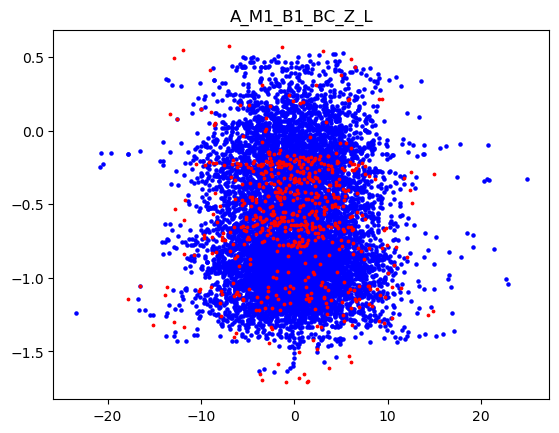

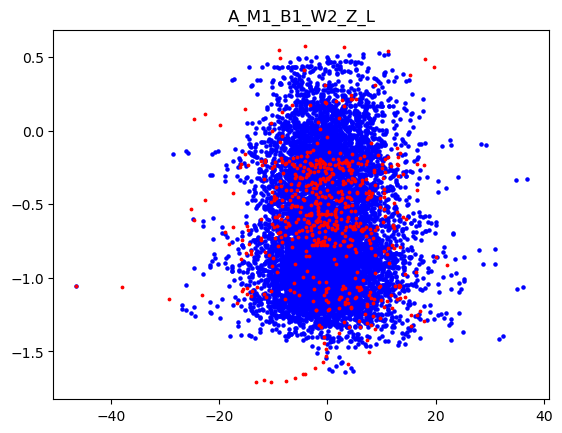

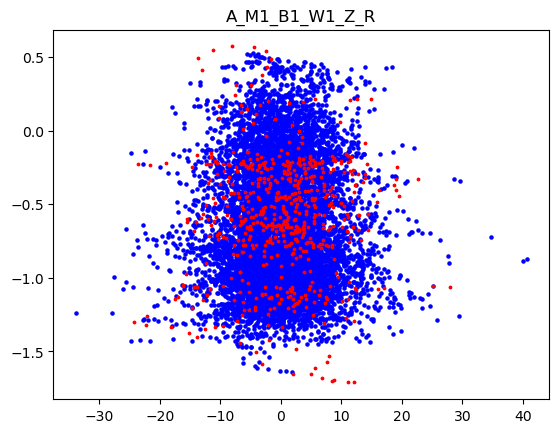

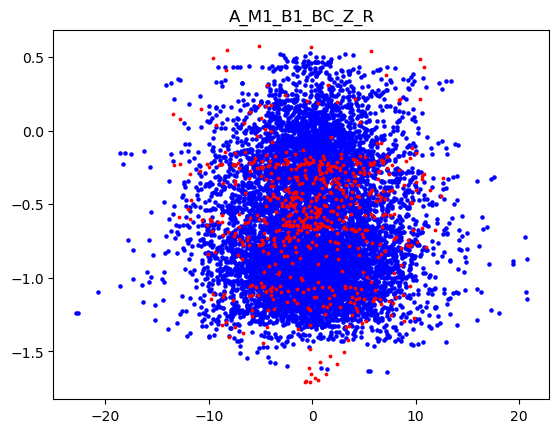

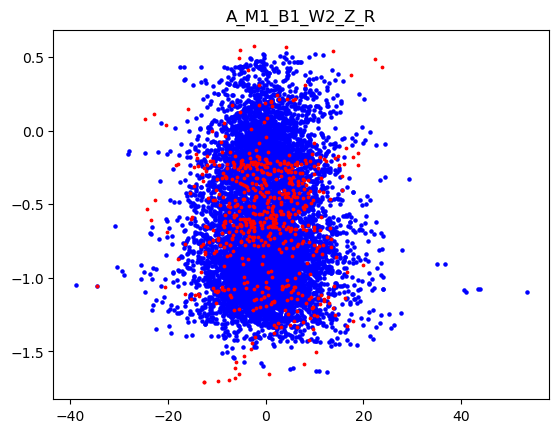

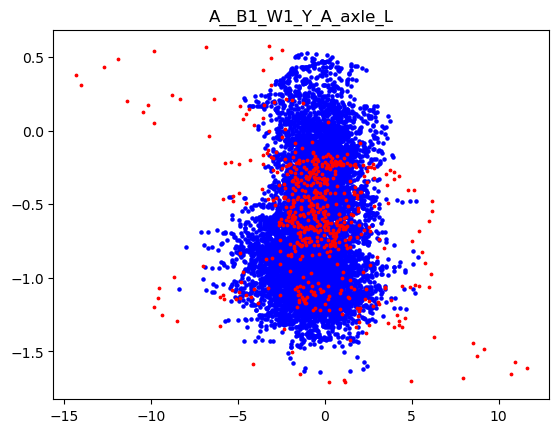

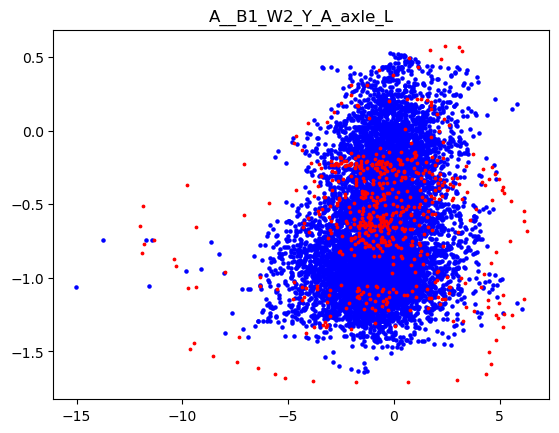

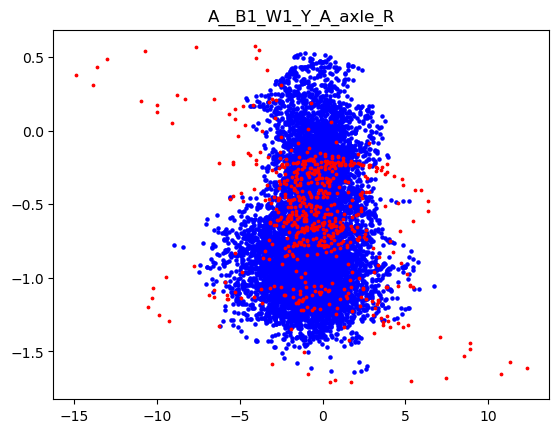

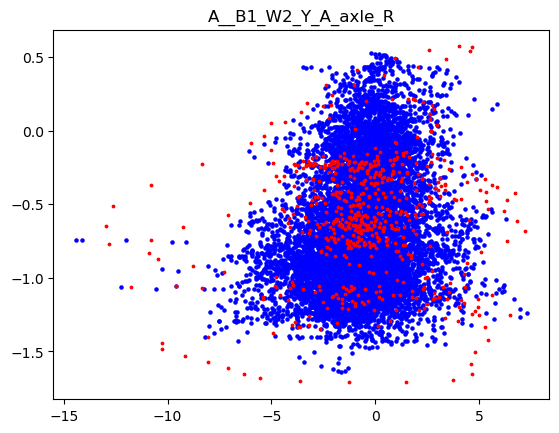

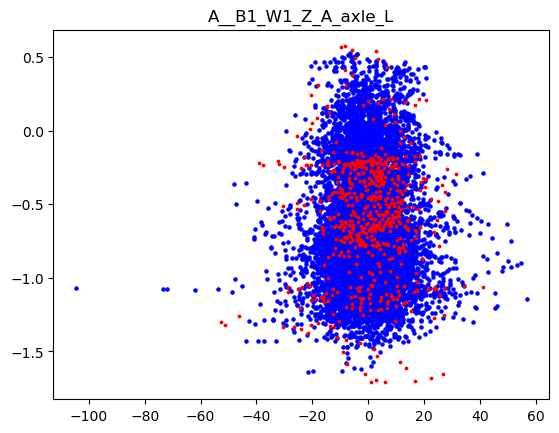

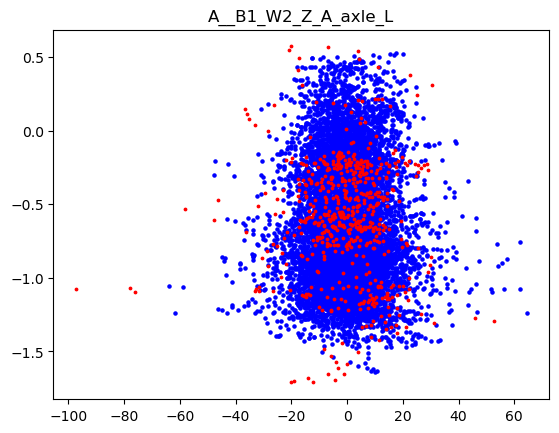

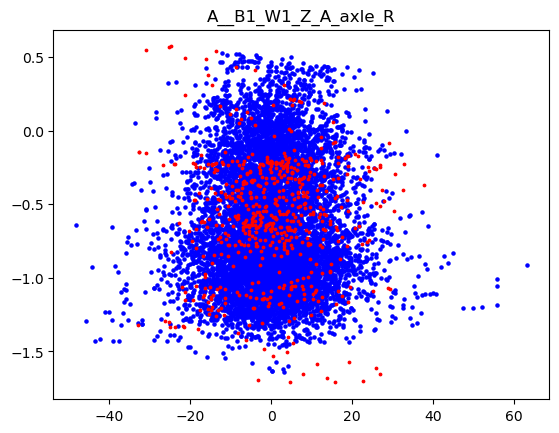

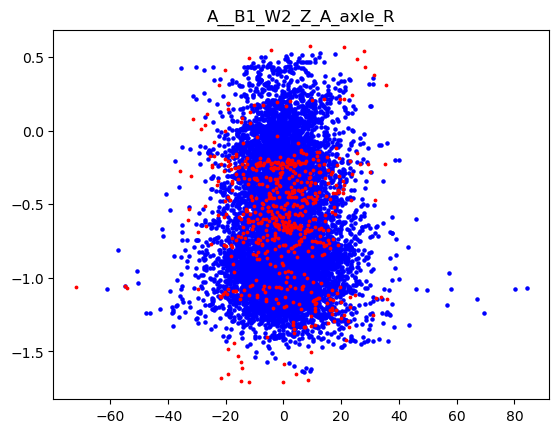

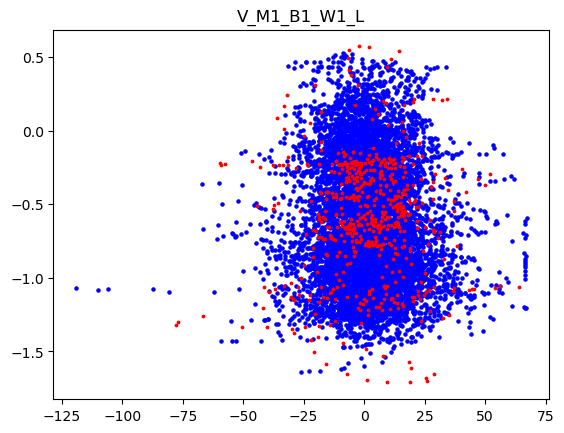

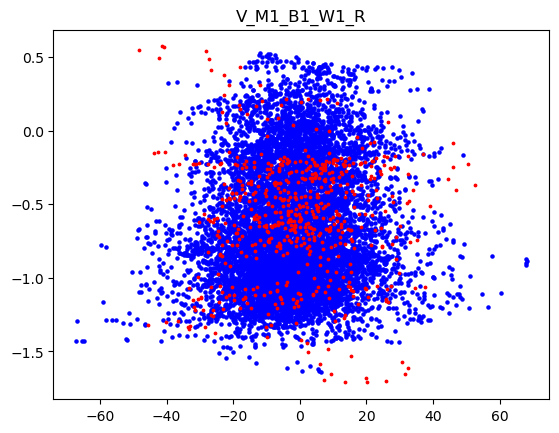

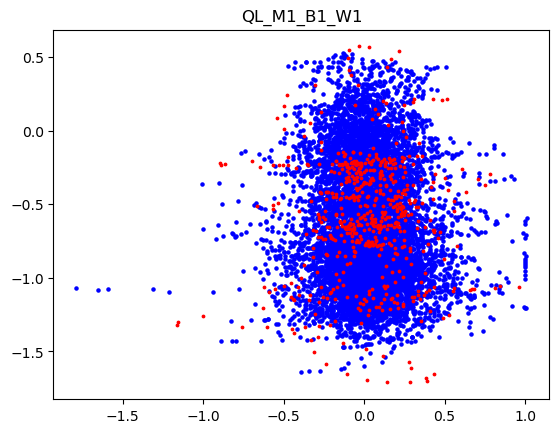

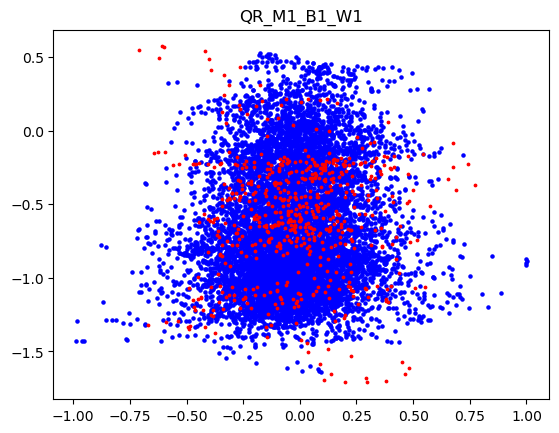

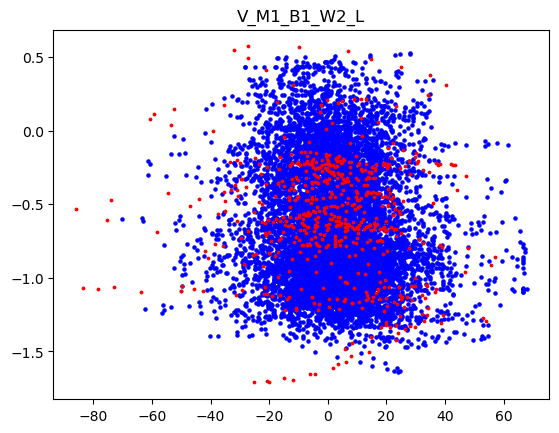

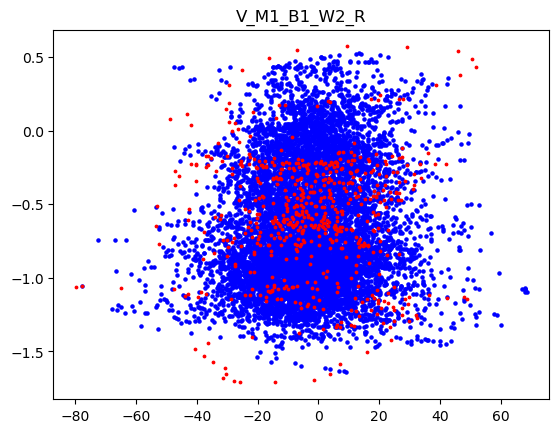

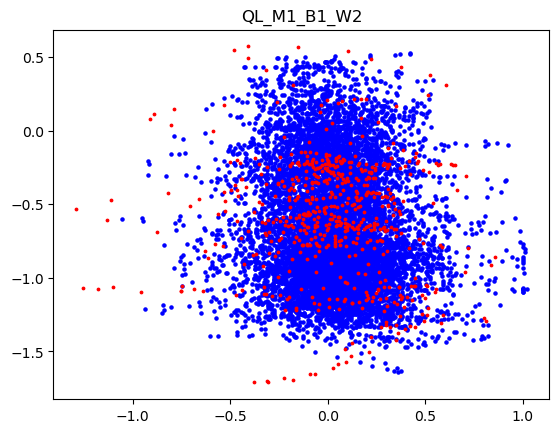

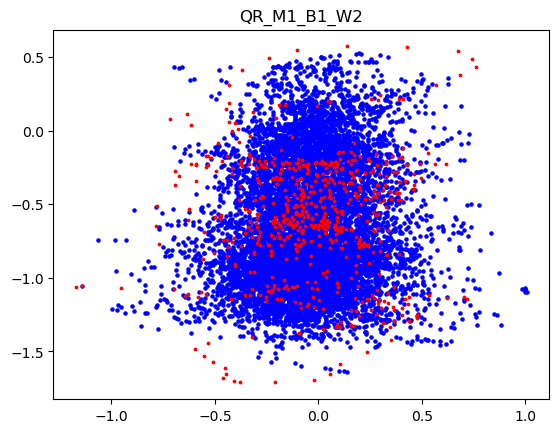

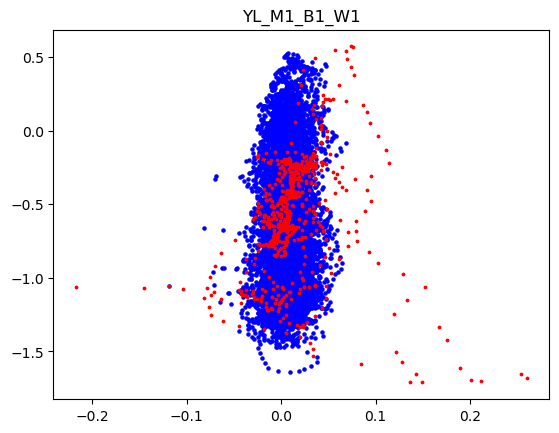

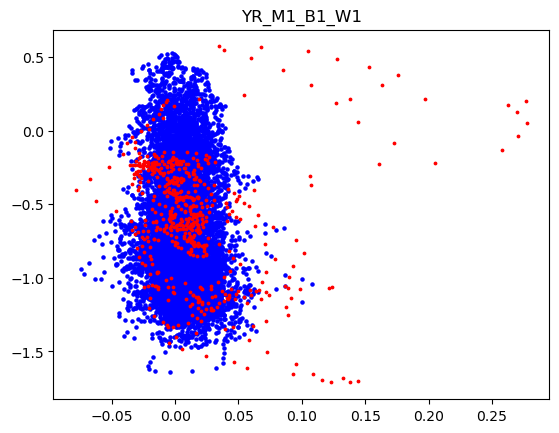

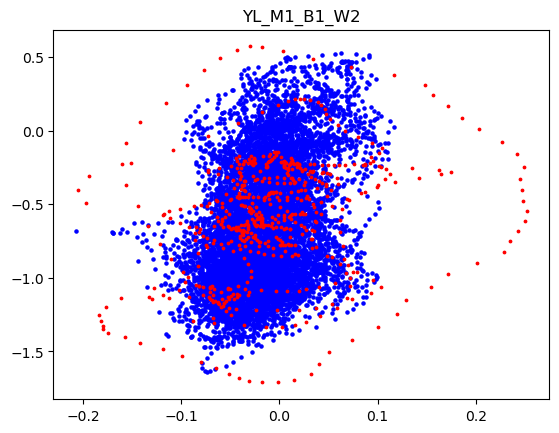

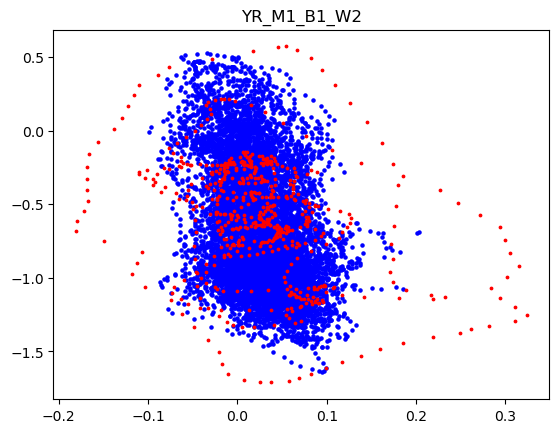

In [87]:
idx = 1
for i in data_c[idx].columns:
    plt.title(i)
    plt.scatter(data_c[idx].loc[:8200,i],data_c[idx].loc[:8200,'A_M1_C_B1_Y'],s=5,c='blue')
    plt.scatter(data_c[idx].loc[8800:10000,i],data_c[idx].loc[8800:10000,'A_M1_C_B1_Y'],s=5,c='blue')
    plt.scatter(data_c[idx].loc[8200:8800,i],data_c[idx].loc[8200:8800,'A_M1_C_B1_Y'],s=3,c='red')
    plt.show()

In [48]:
data_c[0].columns

Index(['Distance', 'A_M1_C_B1_Y', 'A_M1_C_B1_Z', 'A_M1_B1_W1_Y_L',
       'A_M1_B1_BC_Y_L', 'A_M1_B1_W2_Y_L', 'A_M1_B1_W1_Y_R', 'A_M1_B1_BC_Y_R',
       'A_M1_B1_W2_Y_R', 'A_M1_B1_W1_Z_L', 'A_M1_B1_BC_Z_L', 'A_M1_B1_W2_Z_L',
       'A_M1_B1_W1_Z_R', 'A_M1_B1_BC_Z_R', 'A_M1_B1_W2_Z_R',
       'A__B1_W1_Y_A_axle_L', 'A__B1_W2_Y_A_axle_L', 'A__B1_W1_Y_A_axle_R',
       'A__B1_W2_Y_A_axle_R', 'A__B1_W1_Z_A_axle_L', 'A__B1_W2_Z_A_axle_L',
       'A__B1_W1_Z_A_axle_R', 'A__B1_W2_Z_A_axle_R', 'V_M1_B1_W1_L',
       'V_M1_B1_W1_R', 'QL_M1_B1_W1', 'QR_M1_B1_W1', 'V_M1_B1_W2_L',
       'V_M1_B1_W2_R', 'QL_M1_B1_W2', 'QR_M1_B1_W2', 'YL_M1_B1_W1',
       'YR_M1_B1_W1', 'YL_M1_B1_W2', 'YR_M1_B1_W2'],
      dtype='object')

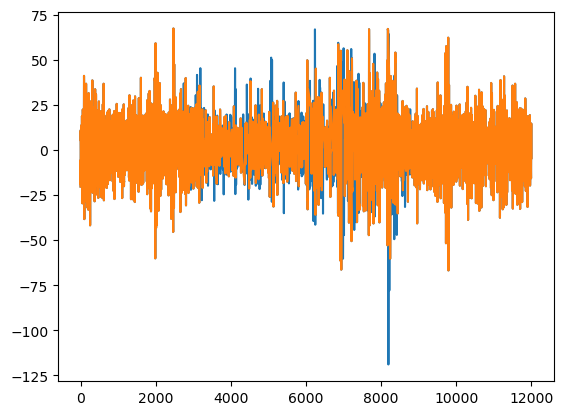

In [72]:
plt.plot(data_c[0]['V_M1_B1_W1_L'])
plt.plot(data_c[0][data_c[0]['A_M1_C_B1_Y'] > -1]['V_M1_B1_W1_L'])


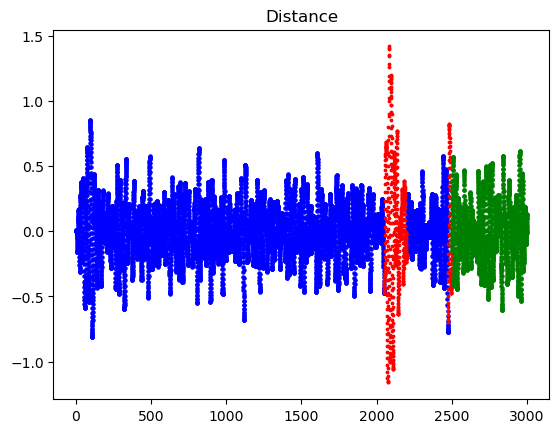

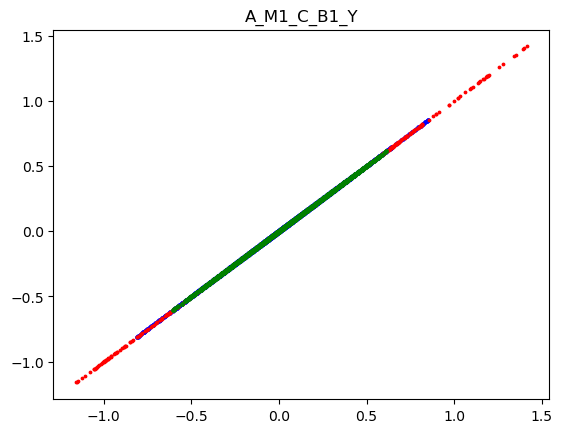

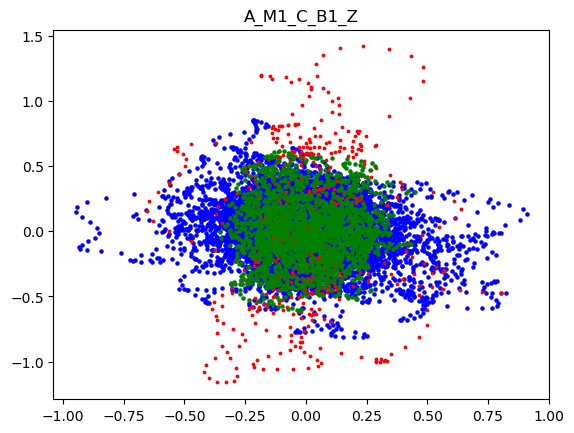

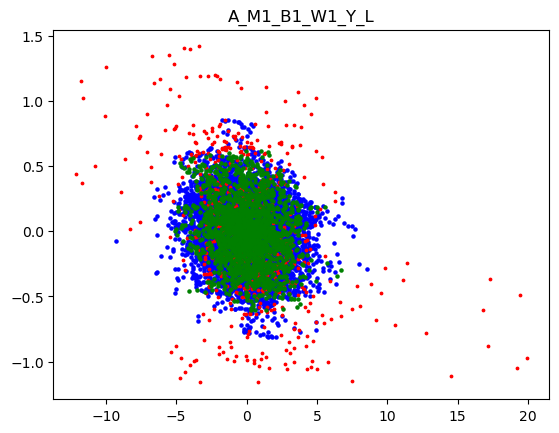

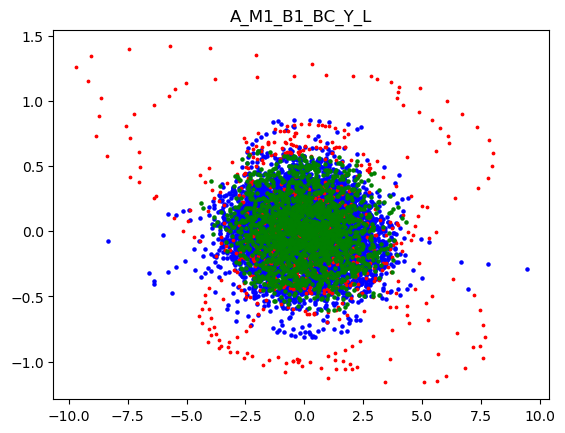

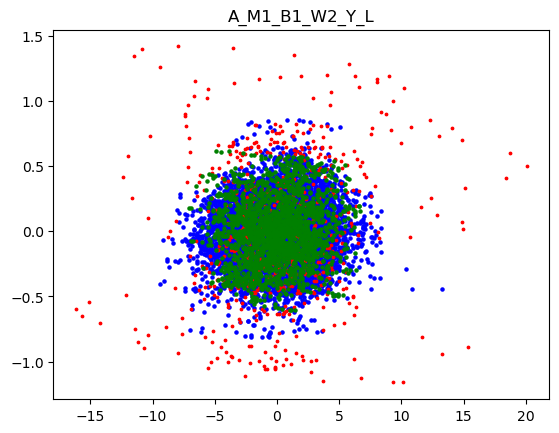

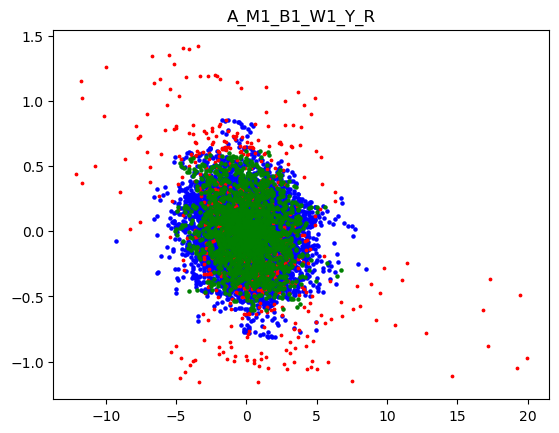

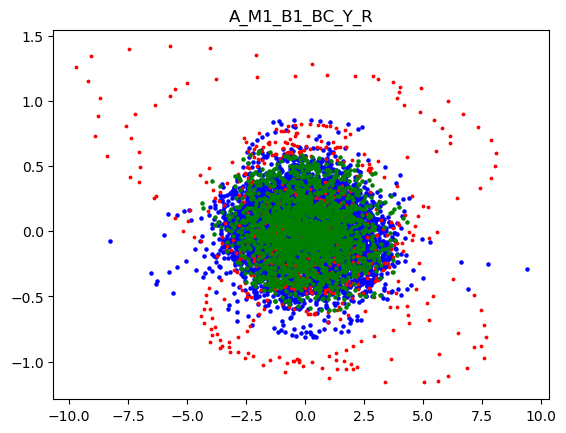

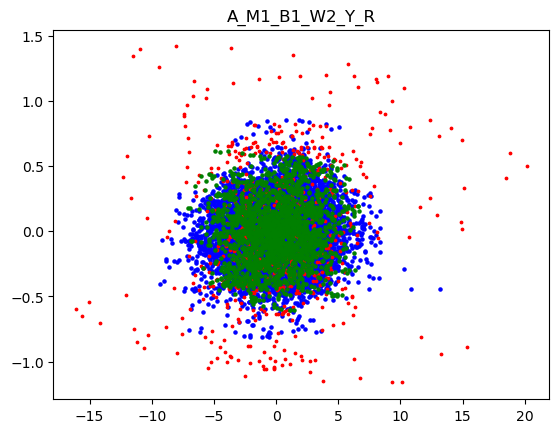

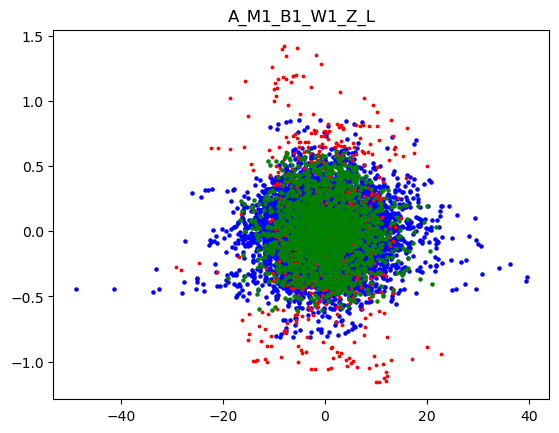

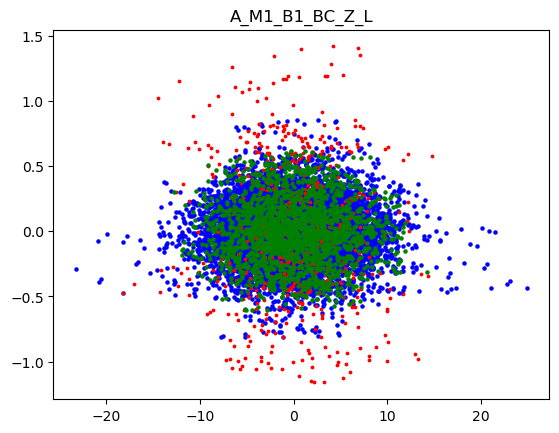

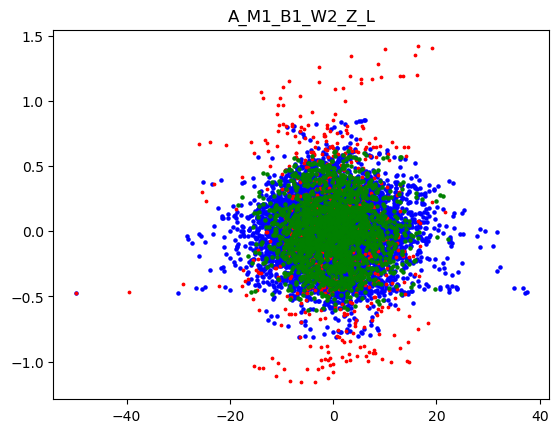

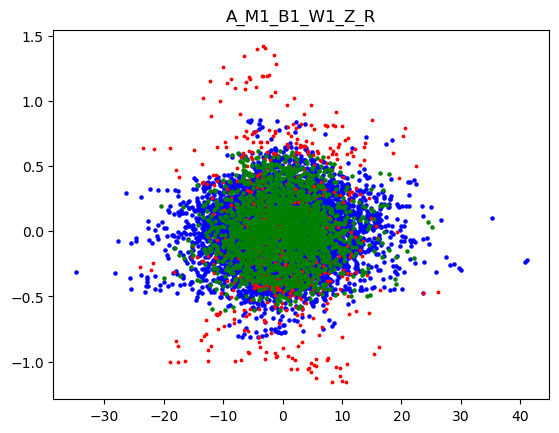

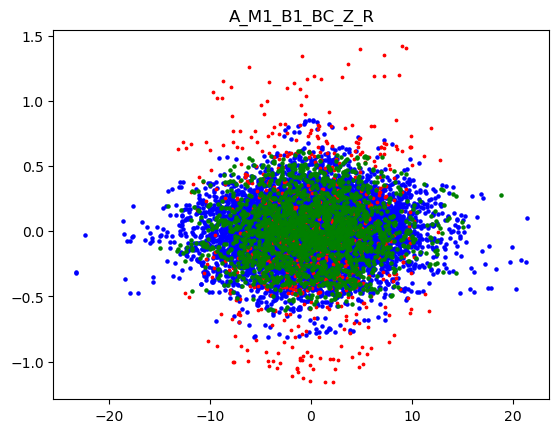

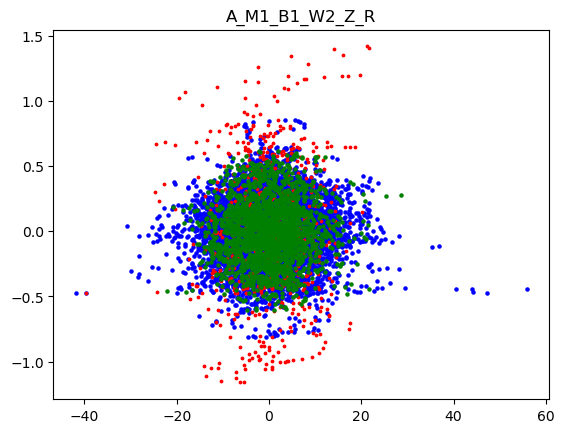

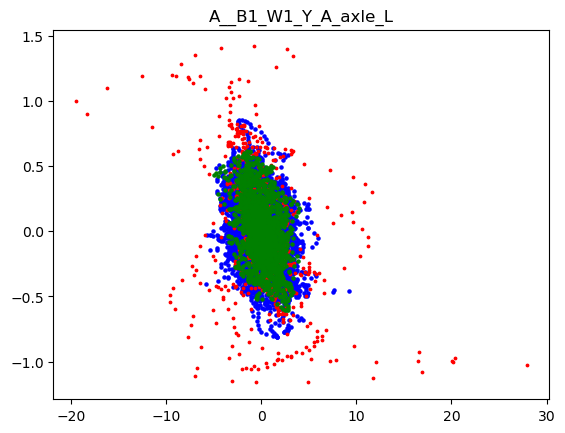

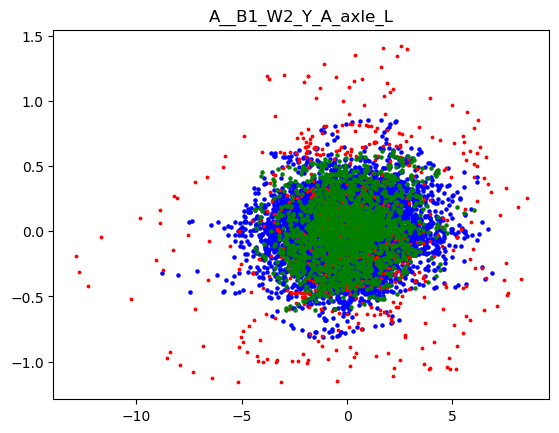

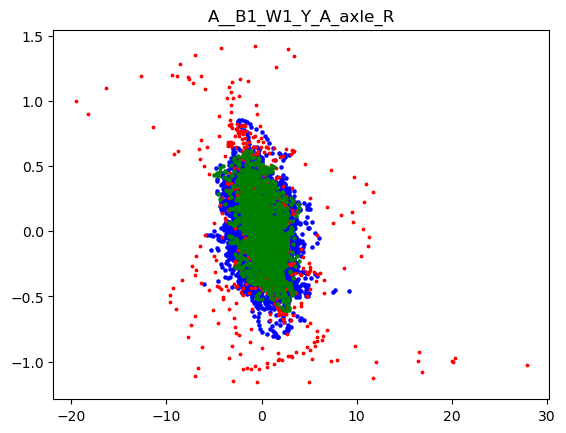

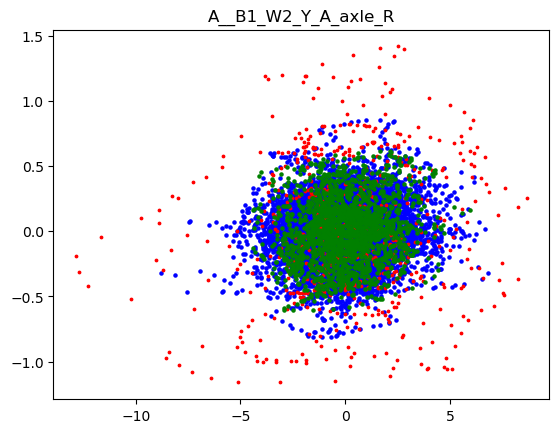

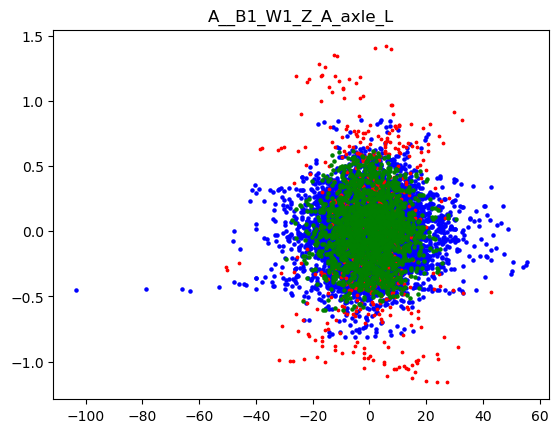

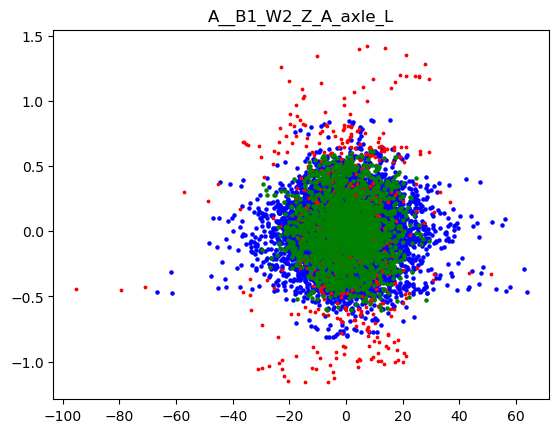

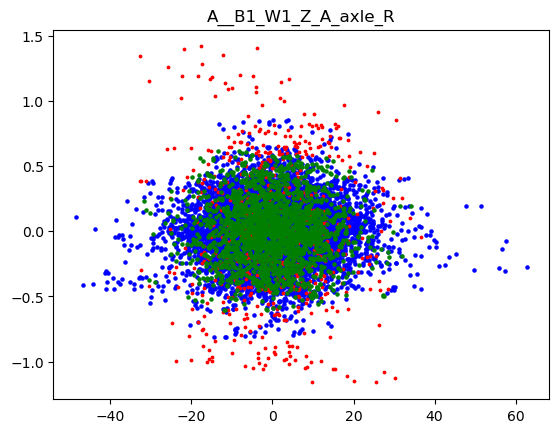

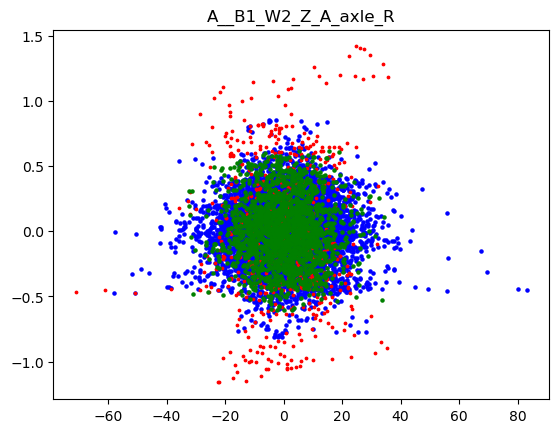

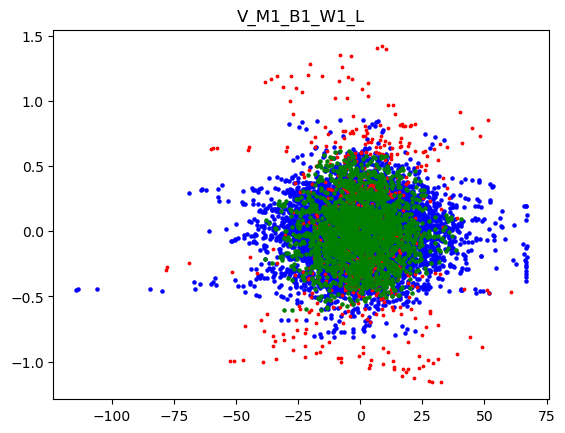

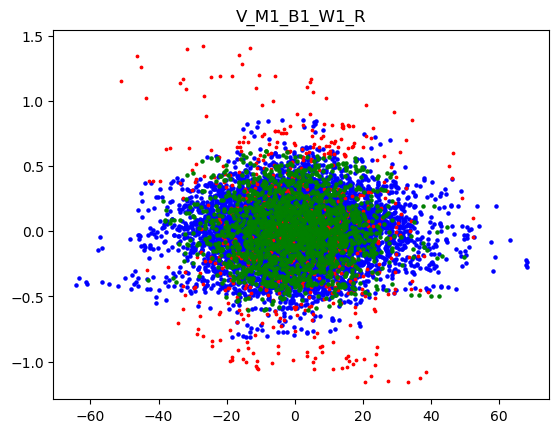

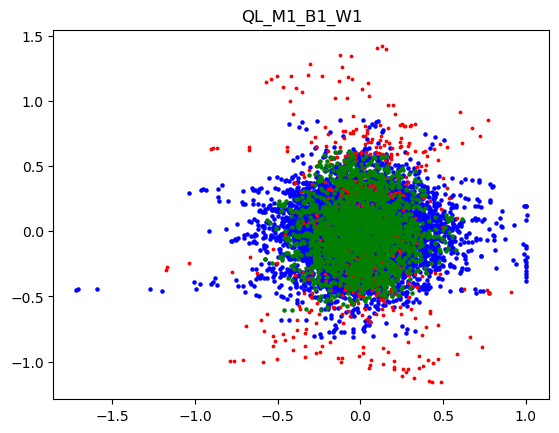

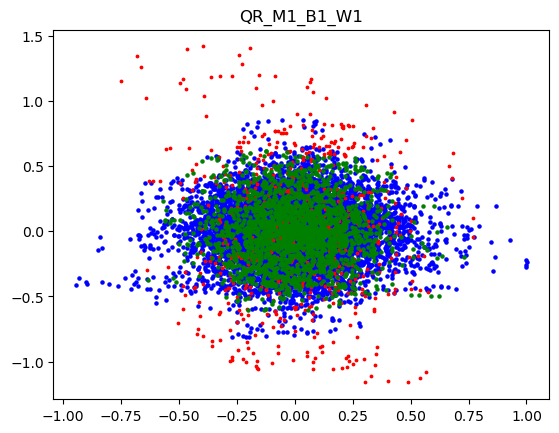

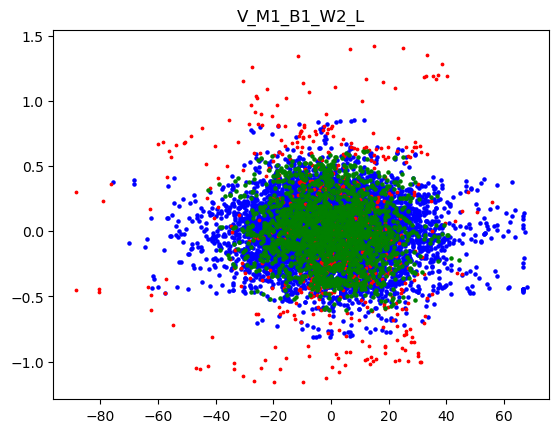

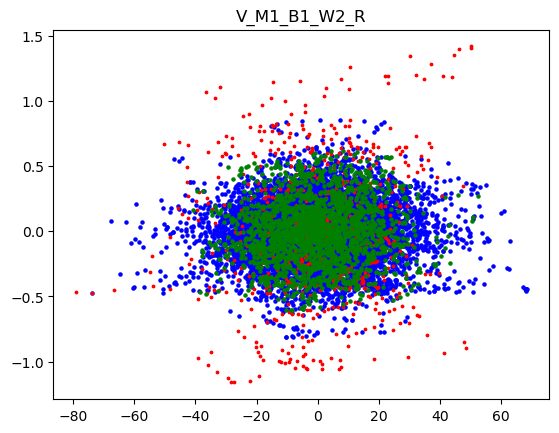

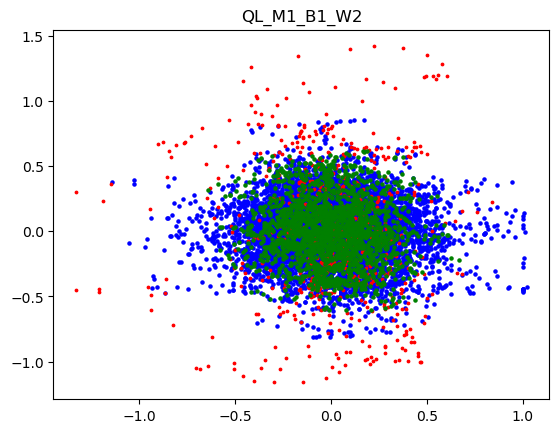

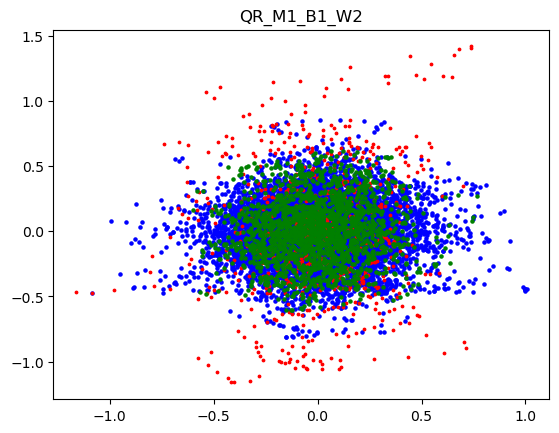

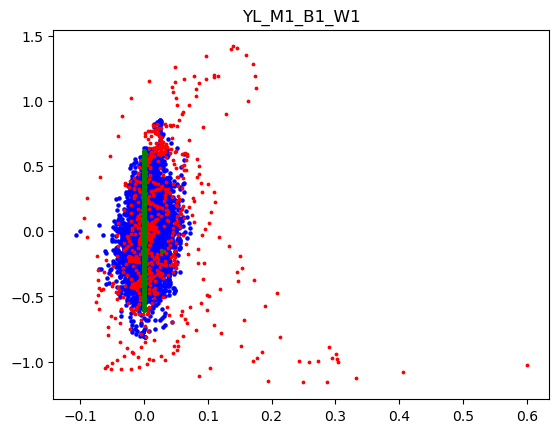

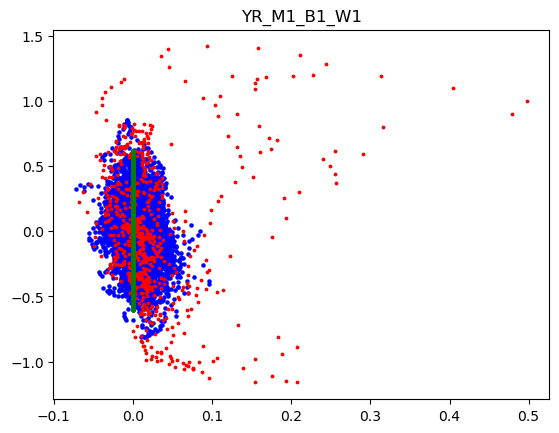

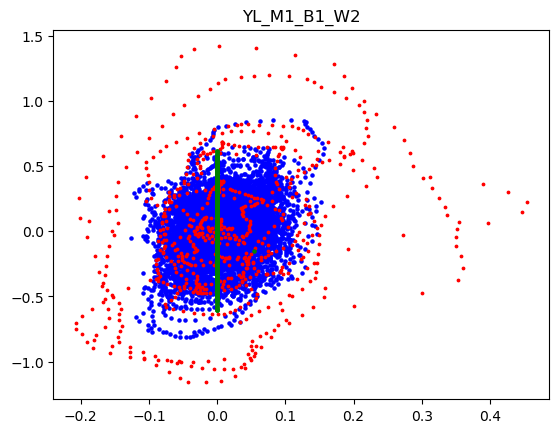

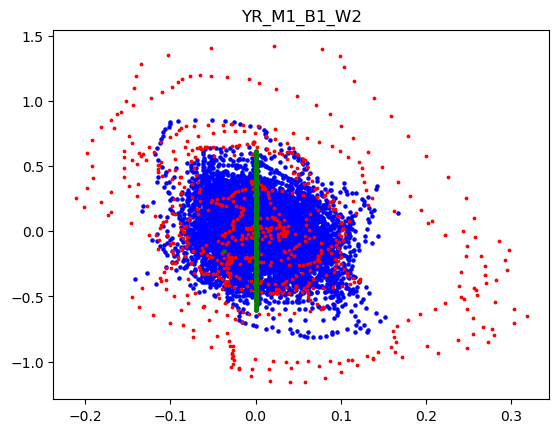

In [104]:
idx = 0
target = 'A_M1_C_B1_Y' # 'V_M1_B1_W1_R','V_M1_B1_W2_L','V_M1_B1_W2_R'
for i in data_s[0].columns:
    plt.title(i)
    plt.scatter(data_s[idx].loc[:8200,i],data_s[idx].loc[:8200,target],s=5,c='blue')
    plt.scatter(data_s[idx].loc[8800:9900,i],data_s[idx].loc[8800:9900,target],s=5,c='blue')
    plt.scatter(data_s[idx].loc[8200:8800,i],data_s[idx].loc[8200:8800,target],s=3,c='red')
    plt.scatter(data_s[idx].loc[9900:10000,i],data_s[idx].loc[9900:10000,target],s=3,c='red')

    plt.scatter(data_s[idx].loc[10000:,i],data_s[idx].loc[10000:,target],s=5,c='green')
    plt.show()